In [7]:
!pip install seaborn

     |████████████████████████████████| 283 kB 2.6 MB/s eta 0:00:01


In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [9]:
# !pip install -U imbalanced-learn

In [10]:
bank_marketing = pd.read_csv('bank-marketing.csv')

In [11]:
credit_card = pd.read_csv('creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
#observe the different feature type present in the data
credit_card.shape

(284807, 31)

In [13]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
# Column names
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
# Missing data for each column
total = credit_card.isnull().sum().sort_values(ascending = False)
print(total)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64


In [16]:
# Therefore, there is no missing data

In [17]:
# Here we will observe the distribution of our classes

classes=credit_card['Class'].value_counts()
normal_share=classes[0]/credit_card['Class'].count()*100
fraud_share=classes[1]/credit_card['Class'].count()*100

print("Normal share", normal_share)
print("Fraud share", fraud_share)

Normal share 99.82725143693798
Fraud share 0.1727485630620034


In [18]:
# As you can see that the data is highly imbalanced: Fraud cases are only 0.17% of the entire dataset.

<AxesSubplot:title={'center':'Frequency by observation number'}, xlabel='Class', ylabel='Number of Observations'>

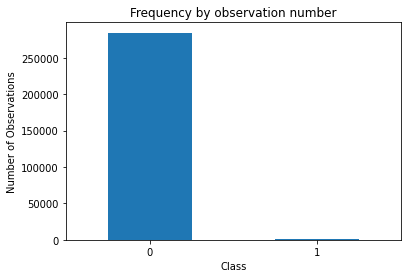

In [19]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
# Ratio of fraud to non-fraud cases
fnf = credit_card["Class"].value_counts()
plt.xlabel("Class")
plt.ylabel("Number of Observations")
# fig.set_size_inches(22, 14)
fnf.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

<AxesSubplot:xlabel='Class', ylabel='Class'>

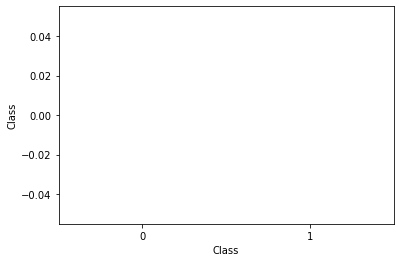

In [20]:
sns.barplot(x='Class', y=fnf, data=credit_card, estimator=lambda x: sum(x==0)*100.0/len(x))

In [ ]:
!pip install plotly==4.12.0

In [21]:
# import plotly.graph_objs as go

# trace = go.Bar(
#     x = credit_card['Class'],y = credit_card['values'],
#     name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
#     marker=dict(color="Olive"),
#     text=credit_card['values'])

# data = [trace]
# layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
#           xaxis = dict(title = 'Class', showticklabels=True), 
#           yaxis = dict(title = 'Number of transactions'),
#           hovermode = 'closest',width=600
#          )
# fig = dict(data=data, layout=layout)
# iplot(fig, filename='class')

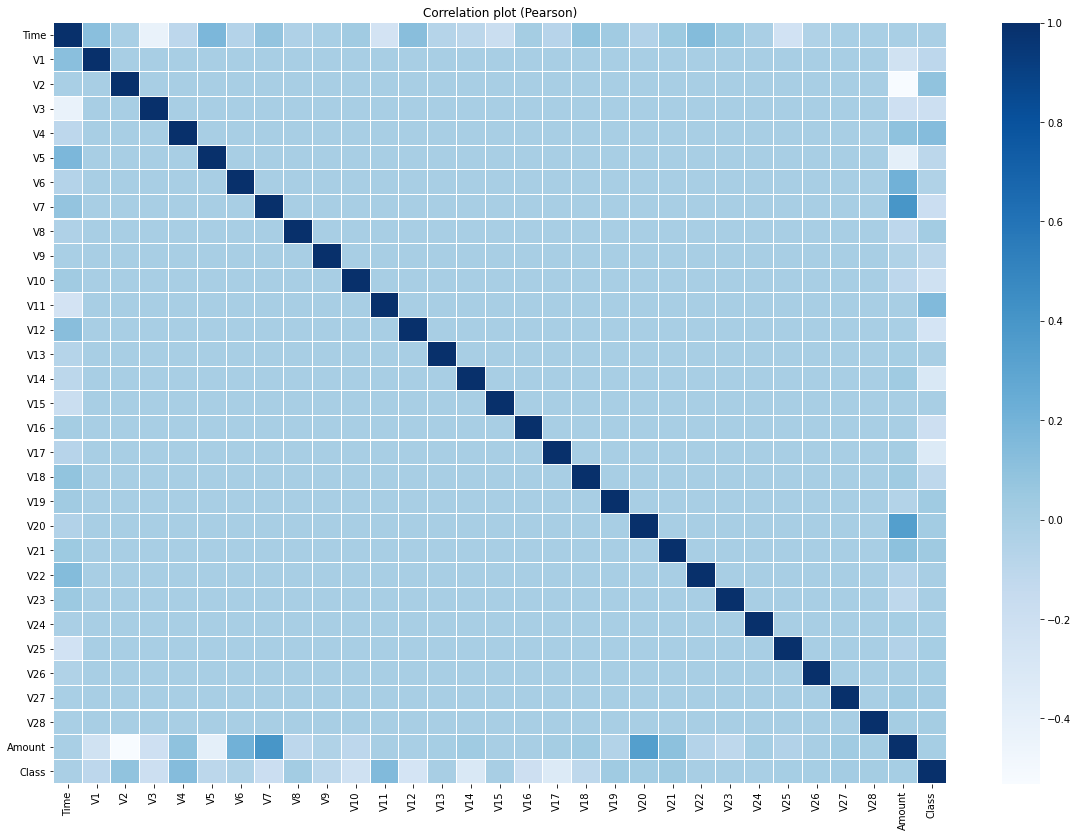

In [24]:
plt.figure(figsize = (20,14))
plt.title('Correlation plot (Pearson)')
corr = credit_card.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


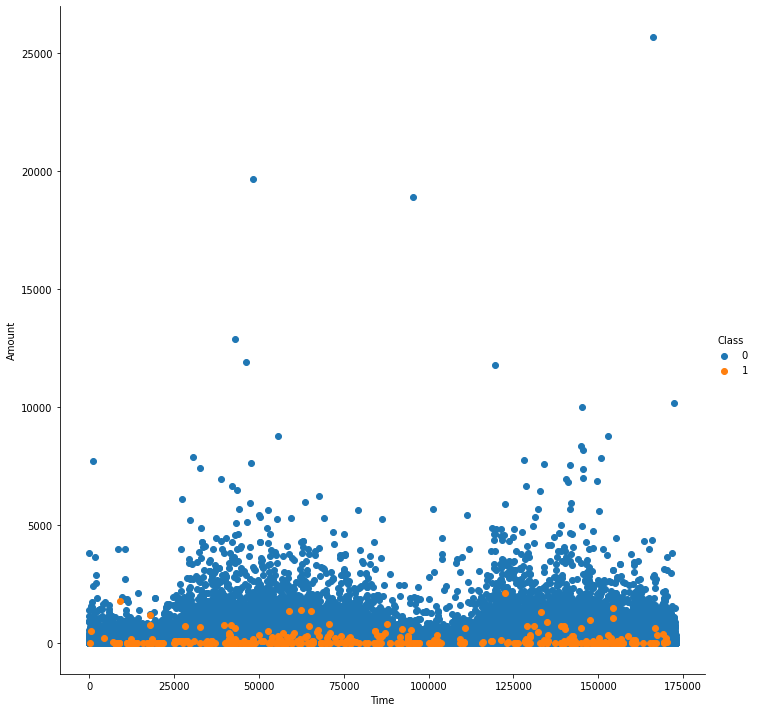

In [25]:
# Create a scatter plot to observe the distribution of classes with time

sns.FacetGrid(credit_card, hue="Class", size = 10).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


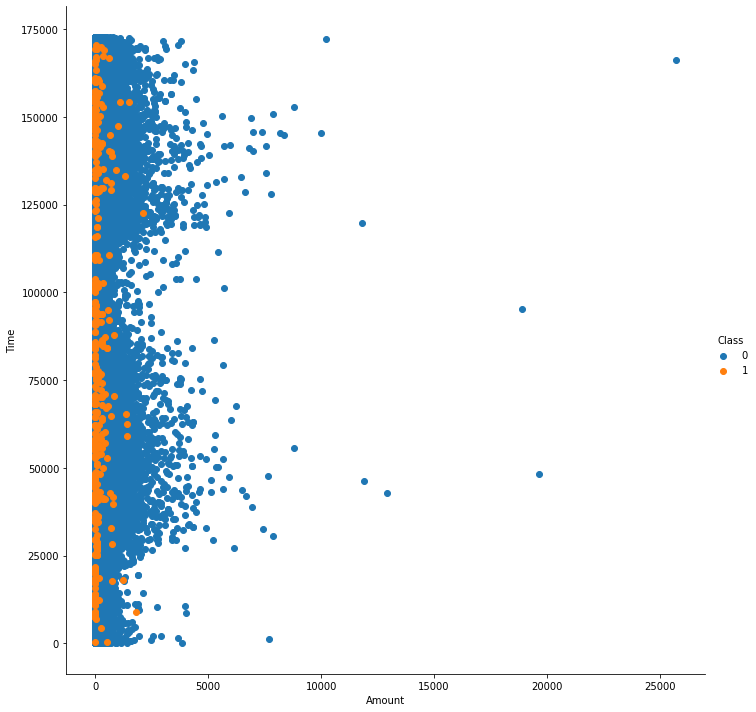

In [26]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.FacetGrid(credit_card, hue="Class", size = 10).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

In [27]:
# Drop unnecessary columns
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
# Getting hours and minutes from the Time
Delta_Time = pd.to_timedelta(credit_card['Time'], unit='s')
#Create derived columns Mins and hours
credit_card['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
credit_card['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
credit_card['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [29]:
# Dropping unnecessary columns
# Dropping Time and mins since we now have hours
credit_card.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
credit_card.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [30]:
### Splitting the data into train & test data

In [31]:
y= credit_card['Class']
# x = credit_card['Amount']
X = credit_card.drop(['Class'], axis=1)

In [32]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(credit_card, test_size=0.33, random_state=42, shuffle=True )
train_df, valid_df = train_test_split(credit_card, test_size=0.33, random_state=42, shuffle=True )

In [33]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=100, test_size=0.20)

In [34]:
##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [35]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [36]:
### Plotting the distribution of a variable


In [37]:
# Plot the histogram of a variable from the dataset to see the skewness

#The fraus Vs normal trasaction by hour
# plt.figure(figsize=(15,5))
# sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='blue')
# sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
# plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
# plt.show()

In [38]:
X = credit_card.drop(['Class'], axis=1)
cols = list(X.columns.values)
print(cols)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time_Hour']


/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

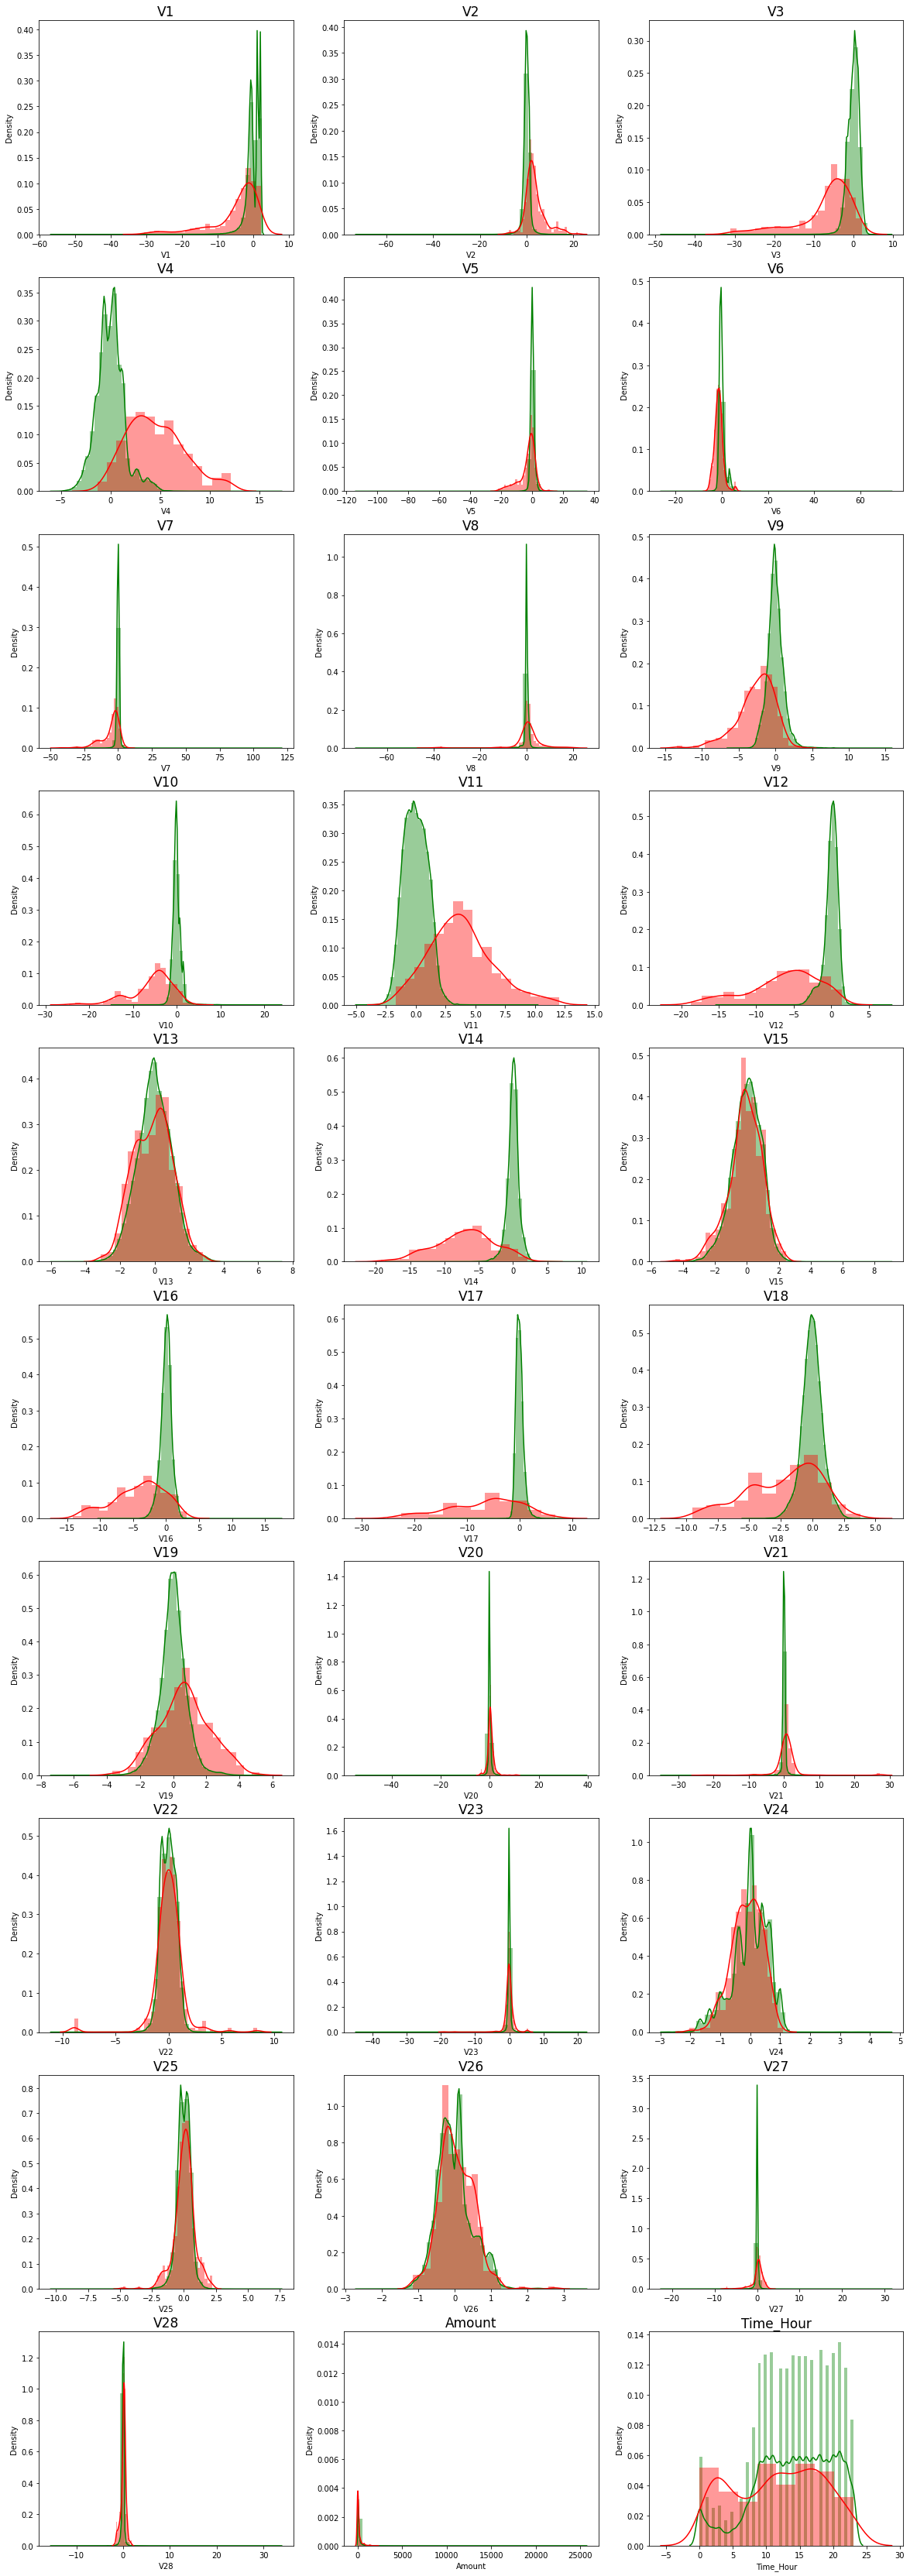

In [39]:
normal_records = credit_card.Class == 0
fraud_records = credit_card.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [40]:
## Model Building
# - Build different models on the imbalanced dataset and see the result

In [41]:
# Store results in credit_card_final
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [42]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [43]:
# Logistic regression


def buildAndRunLogisticModels(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [47]:
## KNN 
from sklearn.metrics import classification_report,confusion_matrix


def buildAndRunKNNModels(df_Results,DataImbalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [45]:
# Another for KNN
creditcard_limit = credit_card[:20000]
creditcard_limit = creditcard_limit.drop(['Class'], axis=1)
creditcard_limit.shape

(20000, 30)

model score
0.9989466661985184
Confusion Matrix


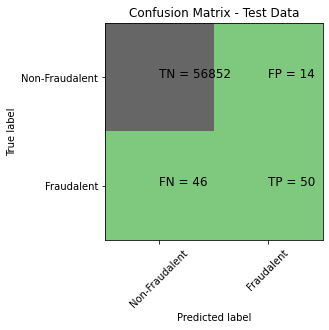

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.52      0.62        96

    accuracy                           1.00     56962
   macro avg       0.89      0.76      0.81     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.8590672589948298
KNN threshold: 0.2
ROC for the test dataset 85.9%


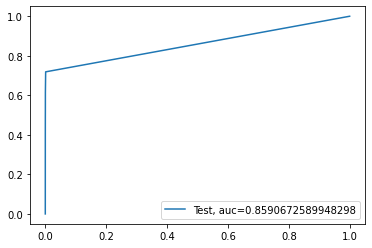

NameError: name 'DataImbalance' is not defined

In [48]:
# Evaluate KNN  model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
#create KNN model and fit the model with train dataset
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(X_train,y_train)
score = knn.score(X_test,y_test)
print("model score")
print(score)
  
# Accuracy
y_pred = knn.predict(X_test)
KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
print("Confusion Matrix")
Plot_confusion_matrix(y_test, y_pred)
print("classification Report")
print(classification_report(y_test, y_pred))


knn_probs = knn.predict_proba(X_test)[:, 1]

# Calculate roc auc
knn_roc_value = roc_auc_score(y_test, knn_probs)
print("KNN roc_value: {0}" .format(knn_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("KNN threshold: {0}".format(threshold))

roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
  
df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

return df_Results

In [49]:
creditcard_limit.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time_Hour'],
      dtype='object')

In [53]:
from sklearn.preprocessing import StandardScaler

# creditcard_limit = credit_card[:20000]
# creditcard_limit = creditcard_limit.drop(['Class'], axis=1)
# creditcard_limit.shape

# creditcard_limit_Std = StandardScaler().fit_transform(creditcard_limit)
# print(creditcard_limit_Std.shape)
# creditcard_limit_labels = creditcard_limit["Class"]


In [55]:
# Find out the best k value for KNN
# X1 = creditcard_limit_Std[0:16000]
# XTest = creditcard_limit_Std[16000:20000]
# Y1 = creditcard_limit_labels[0:16000]
# YTest = creditcard_limit_labels[16000:20000]

In [56]:
myList = list(range(0,50))
neighbors = list(filter(lambda x: x%2!=0, myList))  #This will give a list of odd numbers only ranging from 0 to 50
CV_Scores = []

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

# for k in neighbors:
#     KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
#     scores = cross_val_score(KNN, X1, Y1, cv = 5, scoring='recall')
#     CV_Scores.append(scores.mean())

In [58]:
# SVM

def buildAndRunSVMModels(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImbalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [59]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [60]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

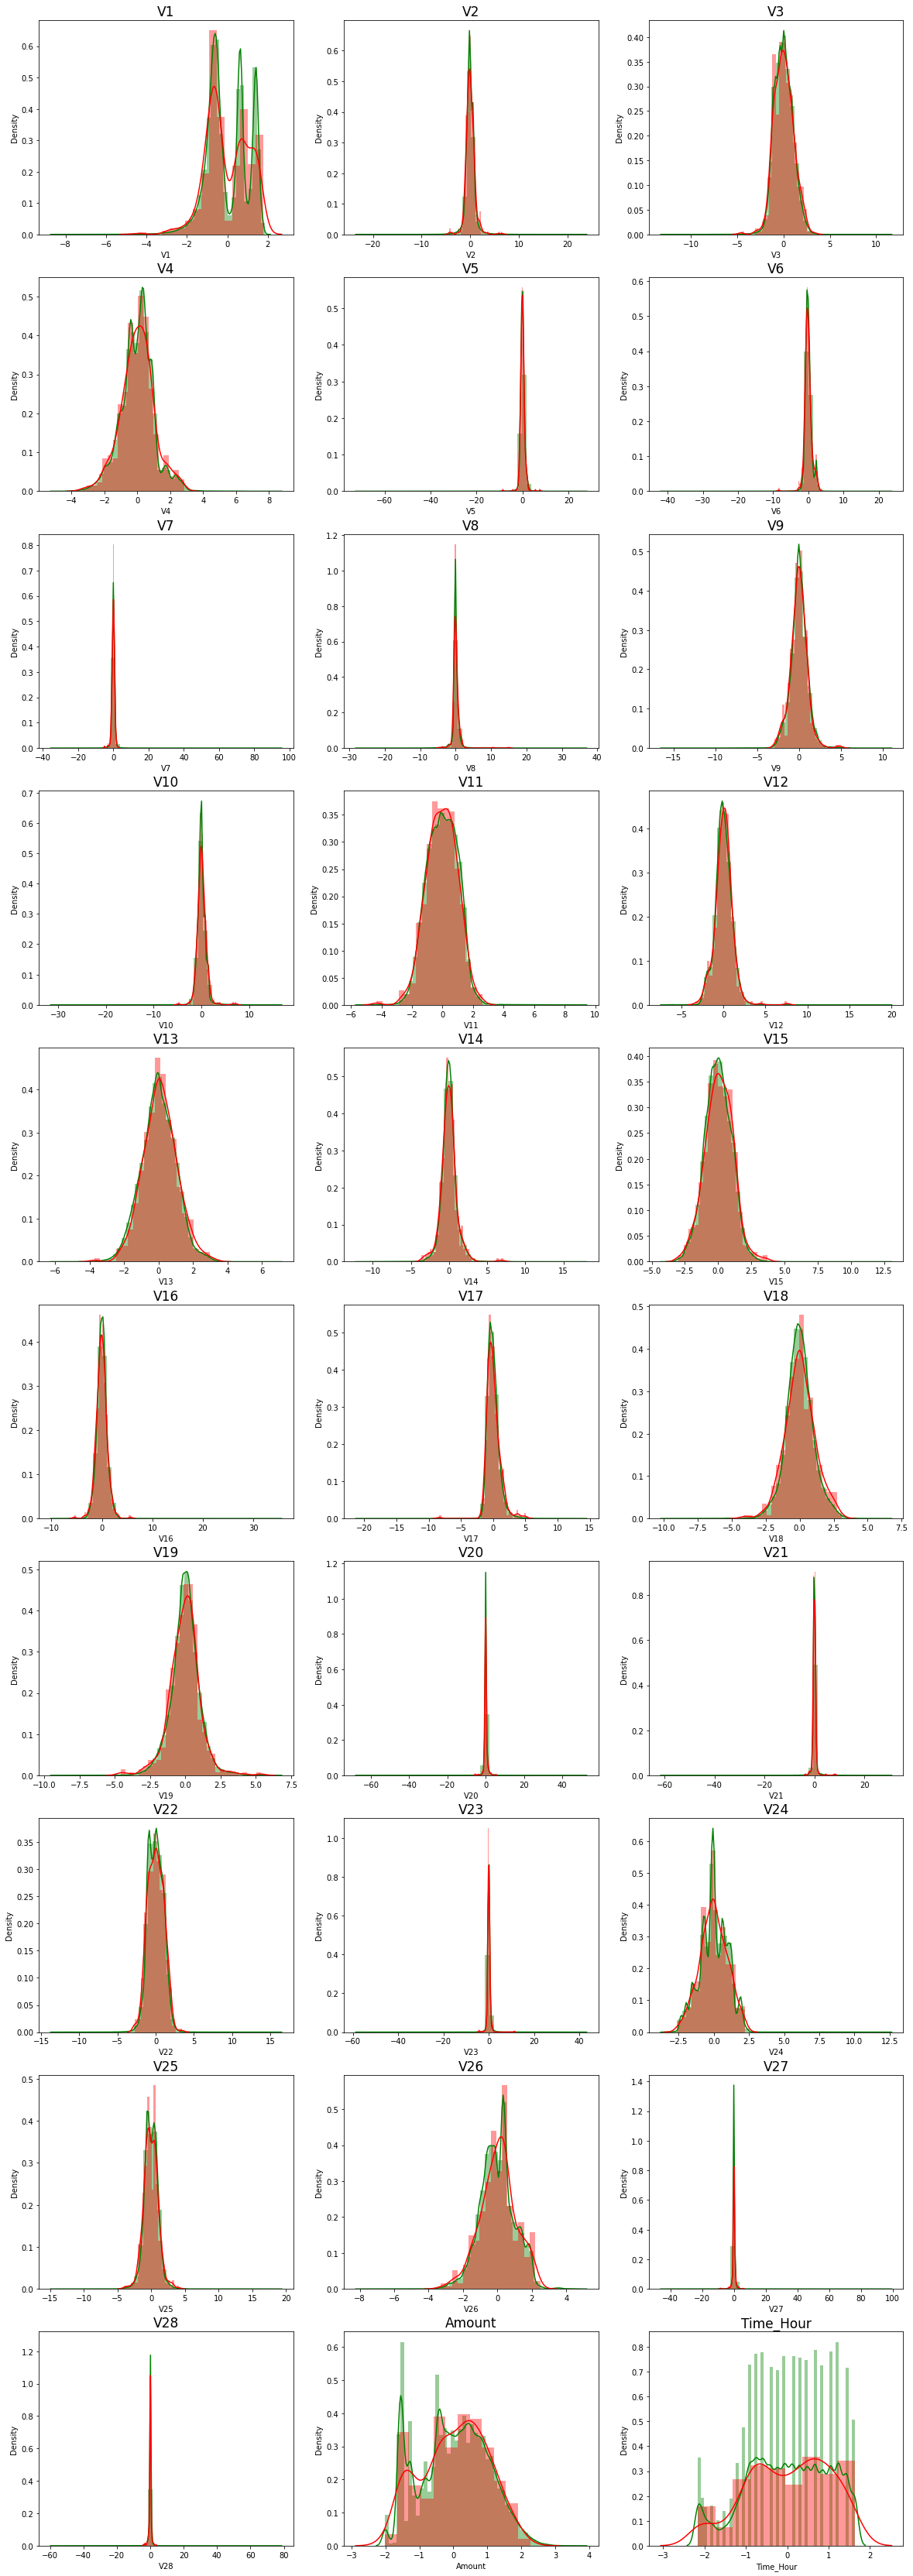

In [61]:
# Histogram for the train datat 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

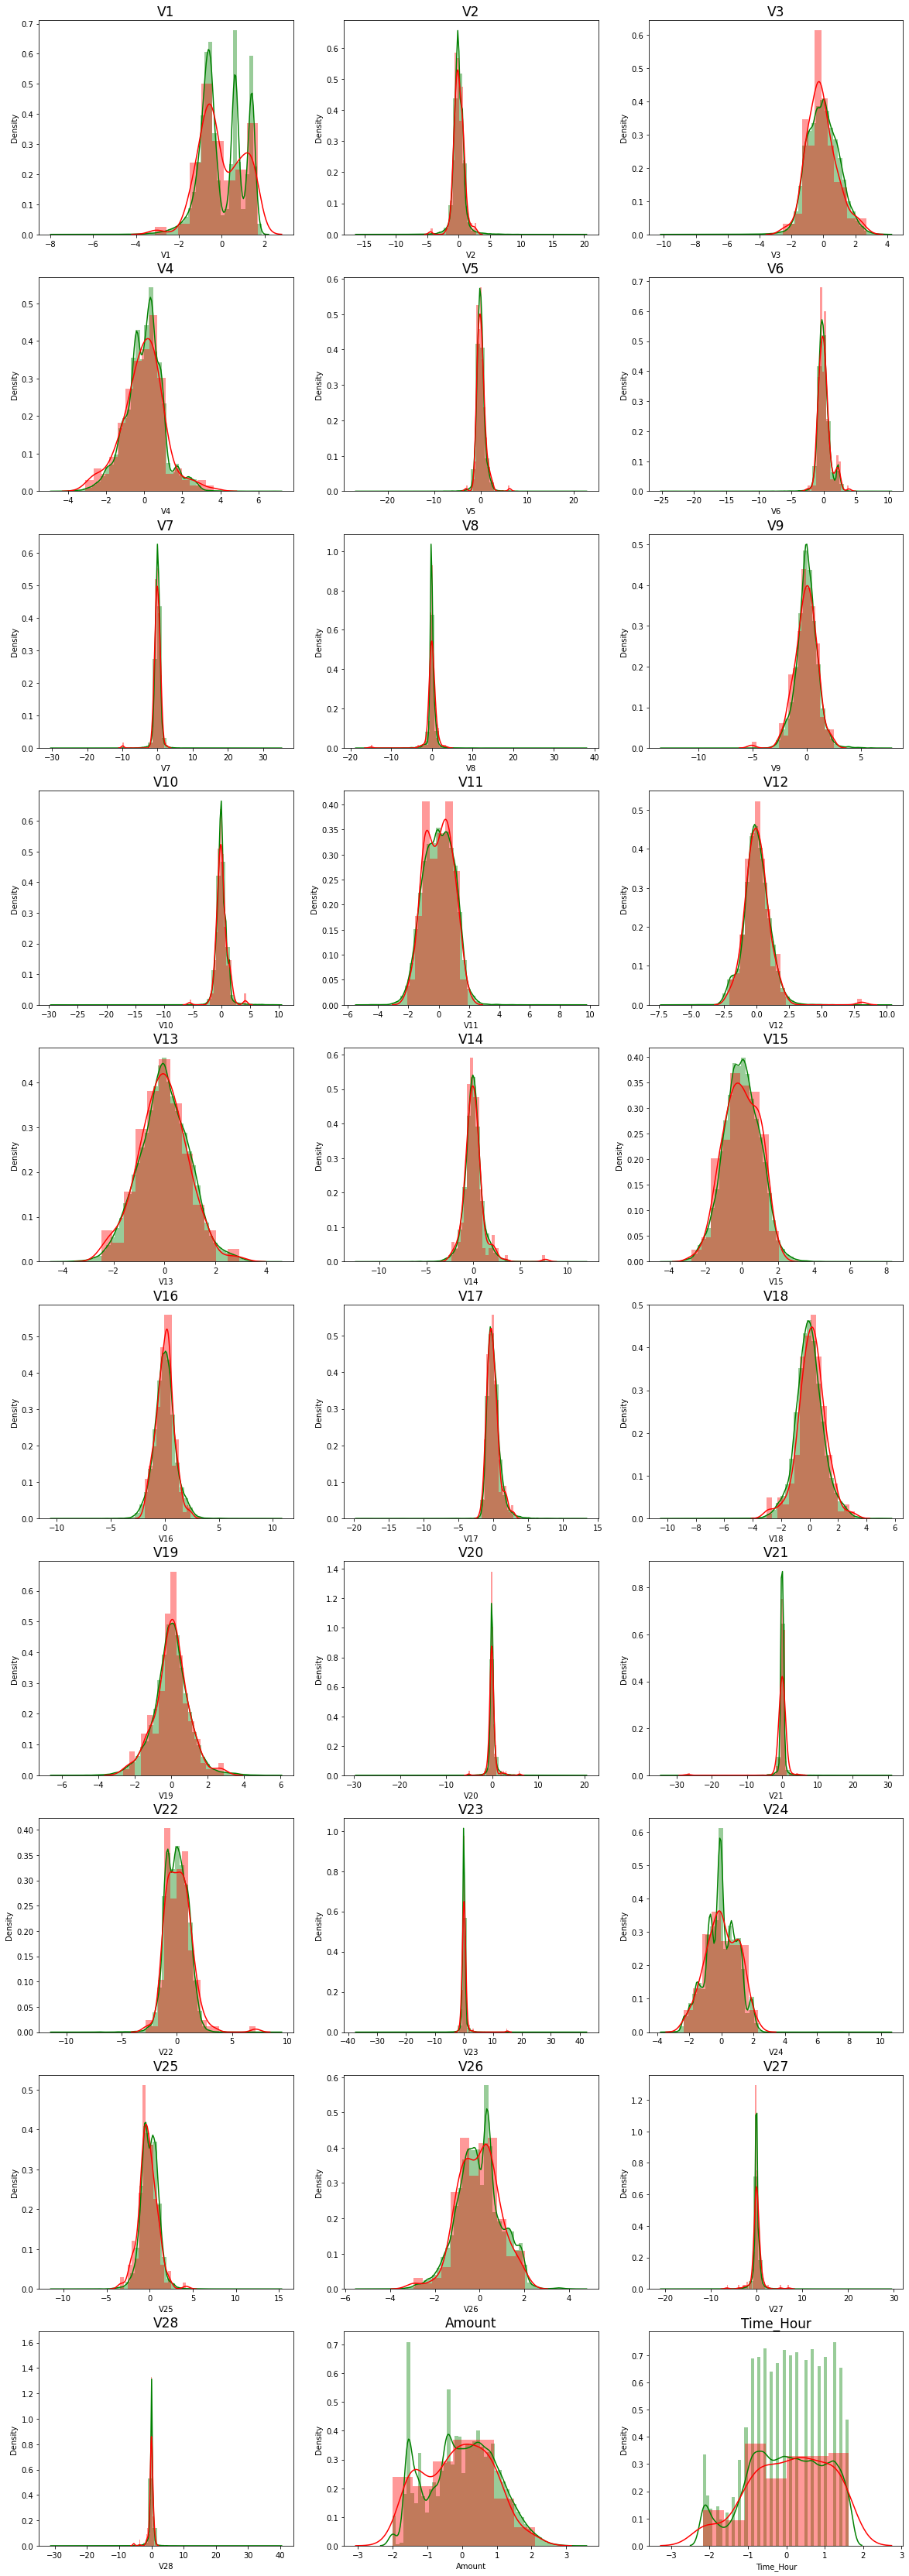

In [62]:
# Histogram for the test data
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [63]:
## Model Building
# - Build different models on the balanced dataset and see the result

Max auc_roc for l2: 0.983760023970567
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularisations
[[-0.09276541 -0.06828297 -0.28652331  0.55493742  0.02789795  0.01396825
  -0.06824953 -0.20408006 -0.18143666 -0.20371291  0.17699968 -0.50183428
  -0.11614819 -0.66830552 -0.0815942  -0.18013738 -0.08164992  0.03866812
  -0.03807332 -0.02310099  0.10465199  0.10090233 -0.03198749 -0.02939204
   0.01001787  0.00785392 -0.04474827 -0.02229527  0.02208228  0.08474082]]
[-8.07230494]
{1: array([[0.90398235, 0.90383704, 0.90383704, 0.90383704, 0.90383704,
        0.90419481, 0.96804377, 0.99255279, 0.99488378, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346],
       [0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 ,
        0.93091836, 0.96502028, 0.98005776, 0.97844439, 0.97856203,
        0.97856203, 0.97856203, 0.97856203, 0.97856203, 0.97856203,
        0.97856203, 0.9

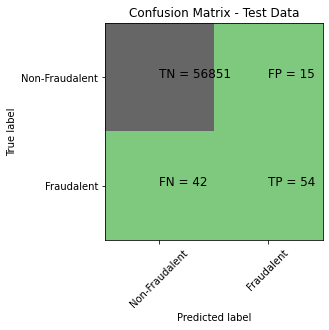

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


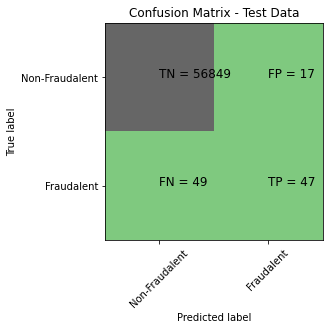

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.001289178584599514
ROC for the test dataset 96.7%


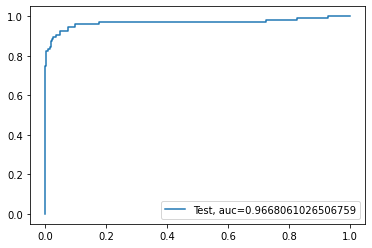

l1 roc_value: 0.9639030791685718
l1 threshold: 0.00927649384502573
ROC for the test dataset 96.4%


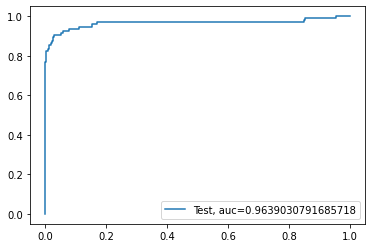

Time taken by logistic regression model:  141.35521030426025 seconds 
--------------------------------------------------------------------------------
model score
0.9992977774656788
Confusion Matrix


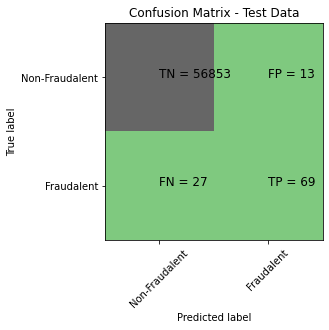

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


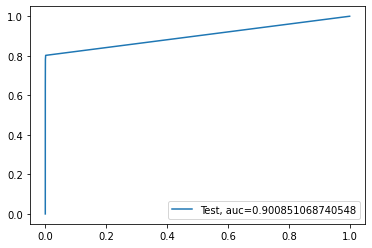

Time taken by KNN model:  492.7374942302704 seconds 
--------------------------------------------------------------------------------


NameError: name 'buildAndRunTreeModels' is not defined

In [64]:
#Run Logistic Regression with L1 And L2 Regularisation

import time

#########################
#Logistic regression
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time taken by logistic regression model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# KNN Model
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time taken by KNN model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# Decision tree models with  gini and entropy criteria
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("taken by decision tree model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# Random forest model
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time taken by random forest model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# XGBoost model

start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time taken by XGBoost model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# SVM 
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time taken by SVM model with sigmoid kernel:  %s seconds " % (time.time() - start_time))

In [65]:
df_Results.head()

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000


In [66]:
# From above, KNN gave the best result with Accuracy of 0.999298 and roc_value of 0.900851

In [67]:
#### perfom cross validation on the X_train & y_train to create:
# - X_train_cv
# - X_test_cv 
# - y_train_cv
# - y_test_cv 

In [68]:
# Cross validation with repeated k fold
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5     23 ... 284793 284795 284803]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    15     21     30 ... 284791 284792 284799]
TRAIN: [     0      2      3 ... 284803 284804 284806] TEST: [     1      4     14 ... 284798 284800 284805]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     8      9     11 ... 284801 284802 284806]
TRAIN: [     1      3      4 ... 284803 284805 284806] TEST: [     0      2      6 ... 284790 284794 284804]
TRAIN: [     1      3      4 ... 284804 284805 284806] TEST: [     0      2      5 ... 284782 284802 284803]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1     10     21 ... 284791 284796 284797]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [    12     17     18 ... 284783 284798 284806]
TRAIN: [     0      1      2 ... 284802 284803 284806] TEST: [     3      4      7 ... 284800 284804 284805]
TRAIN: [     0     

Max auc_roc for l2: 0.9799375439838629
Max auc_roc for l1: 0.9683882854287651
Parameters for l2 regularisations
[[-8.72183285e-03  3.76712812e-02 -7.99221896e-02  2.33382950e-01
   8.69593468e-02 -4.72902419e-02 -3.38583902e-02 -1.12621974e-01
  -8.62301755e-02 -1.61414966e-01  1.14907815e-01 -1.84445790e-01
  -5.24336699e-02 -3.62358574e-01 -3.07530570e-03 -8.80064964e-02
  -8.37437151e-02 -3.89921981e-03 -1.35948262e-03 -1.76284692e-02
   3.74812943e-02  2.43205286e-02 -1.28566183e-02 -1.08756141e-02
  -1.04441402e-02  9.18159746e-03 -7.30652540e-03  1.44327965e-03
   2.96312999e-04  1.32573578e-02]]
[-7.59794794]
{1: array([[0.59968328, 0.60153606, 0.6232516 , 0.78759532, 0.94637108,
        0.96843548, 0.98481794, 0.98490446, 0.97675993, 0.97043522,
        0.97043522, 0.97043522, 0.97043522, 0.97043522, 0.97043522,
        0.97043522, 0.97043522, 0.97043522, 0.97043522, 0.97043522],
       [0.61656262, 0.61811262, 0.63215172, 0.75650833, 0.90434723,
        0.96038075, 0.99343587,

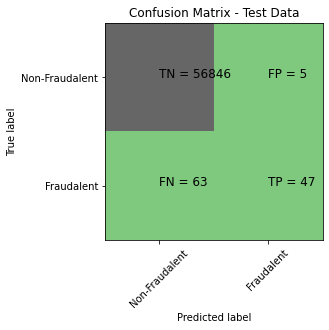

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.90      0.43      0.58       110

    accuracy                           1.00     56961
   macro avg       0.95      0.71      0.79     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9988764242200804
Confusion Matrix


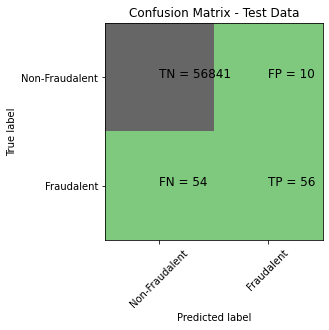

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.85      0.51      0.64       110

    accuracy                           1.00     56961
   macro avg       0.92      0.75      0.82     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9956634647827415
l2 threshold: 0.0018069157541717132
ROC for the test dataset 99.6%


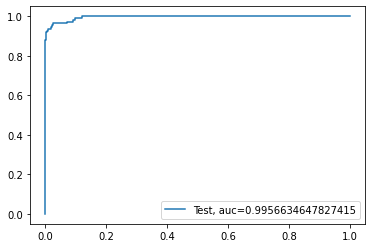

l1 roc_value: 0.9135966265884825
l1 threshold: 0.04396794222977138
ROC for the test dataset 91.4%


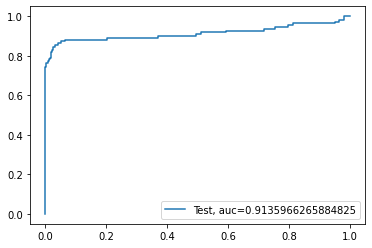

Time taken by logistic regression odel:  344.9662446975708 seconds 
--------------------------------------------------------------------------------
model score
0.999280209265989
Confusion Matrix


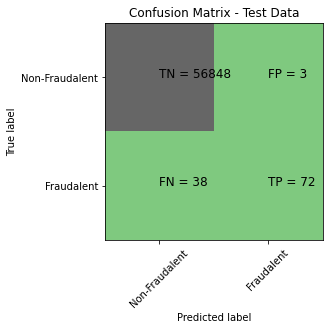

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56851
           1       0.96      0.65      0.78       110

    accuracy                           1.00     56961
   macro avg       0.98      0.83      0.89     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.9043739536043981
KNN threshold: 0.2
ROC for the test dataset 90.4%


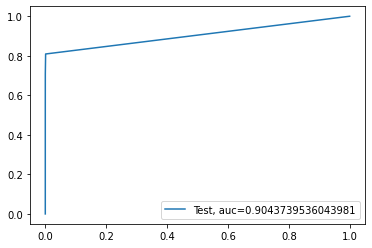

Time taken by KNN:  49.66092133522034 seconds 
--------------------------------------------------------------------------------


NameError: name 'buildAndRunTreeModels' is not defined

In [69]:
#########################
#Logistic regression
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time taken by logistic regression odel:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# KNN Model
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time taken by KNN:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# Decision tree models with  gini and entropy criteria
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time taken by decision tree model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# Random forest model
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time taken by random forest model:  %s seconds " % (time.time() - start_time))
print('-'*80 )


#########################
# XGBoost model
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time taken by XGBoost model:  %s seconds " % (time.time() - start_time))
print('-'*80 )


#########################
# SVM model 
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time taken by SVM model:  %s seconds " % (time.time() - start_time))


In [36]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold


In [223]:
# from the ablve result, XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value of 0.984352"

In [38]:
!pip3 install xgboost

     |████████████████████████████████| 127.6 MB 8.9 kB/s eta 0:00:013
You should consider upgrading via the '/home/disha/my_project_dir/my_project_env/bin/python -m pip install --upgrade pip' command.


In [39]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

/home/disha/my_project_dir/my_project_env/lib/python3.5/site-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


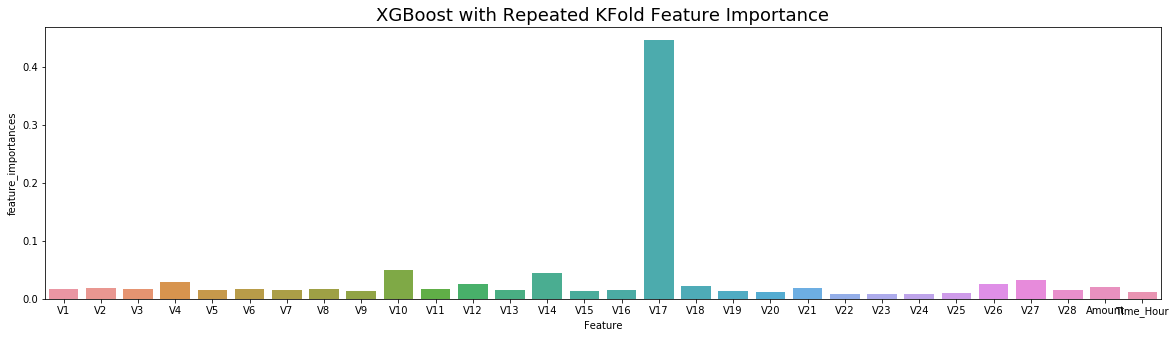

In [40]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)
plt.show()

In [41]:
# Perform cross validation with StratifiedKFold

In [42]:
from sklearn.model_selection import StratifiedKFold

In [43]:
# tratifiedKFold and check the results

skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Max auc_roc for l2: 0.9823777694998738
Max auc_roc for l1: 0.9532044417995286
Parameters for l2 regularisations
[[ 6.71001525e-03  6.16370376e-02 -6.70430929e-02  2.18744353e-01
   5.39871559e-02 -3.19358624e-02 -2.27848703e-02 -1.14965802e-01
  -6.95591881e-02 -1.63702196e-01  1.27863796e-01 -1.91761656e-01
  -3.71106255e-02 -3.60818344e-01  3.57660039e-03 -8.79246426e-02
  -7.26881396e-02 -7.11152223e-04  3.92933126e-03 -2.82153374e-02
   3.81480292e-02  2.34074915e-02 -1.16619775e-02 -9.98280903e-03
  -6.54056115e-03  6.30761791e-03 -1.01186263e-02 -1.69188875e-03
   3.99037952e-04 -1.09248974e-04]]
[-7.42083648]
{1: array([[0.69243733, 0.69420152, 0.71446994, 0.83768575, 0.95579612,
        0.97136042, 0.98915673, 0.99473675, 0.99128052, 0.99117906,
        0.99117906, 0.99117906, 0.99117906, 0.99117906, 0.99117906,
        0.99117906, 0.99117906, 0.99117906, 0.99117906, 0.99117906],
       [0.60697717, 0.60863153, 0.62911463, 0.7688161 , 0.90899478,
        0.94877822, 0.96037283,

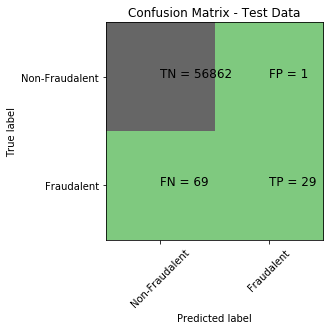

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.998630642018223
Confusion Matrix


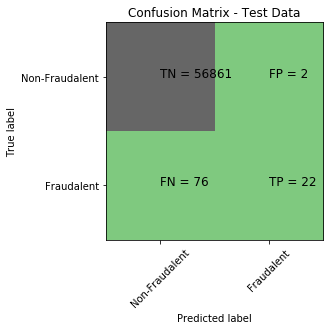

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.22      0.36        98

    accuracy                           1.00     56961
   macro avg       0.96      0.61      0.68     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833536530874242
l2 threshold: 0.001563424225136373
ROC for the test dataset 98.3%


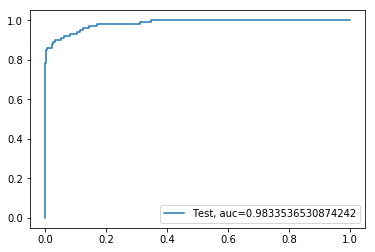

l1 roc_value: 0.9234125917394727
l1 threshold: 0.004244430667996755
ROC for the test dataset 92.3%


/home/disha/my_project_dir/my_project_env/lib/python3.5/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


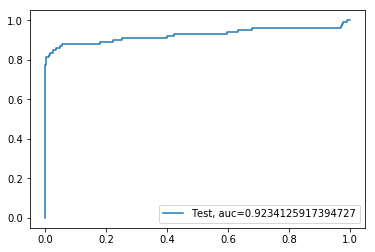

Time taken by logistic regression model:  322.3421370983124 seconds 
--------------------------------------------------------------------------------


NameError: name 'buildAndRunKNNModels' is not defined

In [45]:
# Logistic regression with L1 And L2 regularisation

import time

#########################
#Logistic regression
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by logistic regression model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# KNN Model
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by KNN model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# Decision tree models with  'gini' & 'entropy' criteria
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by decision tree model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# Random forest model
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by random forest model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# XGBoost model
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by XGBoost model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#########################
# SVM model with
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time taken by SVM model with sigmoid kernel:  %s seconds " % (time.time() - start_time))


In [70]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998806,0.995663,0.001807
4,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998876,0.913597,0.043968
5,RepeatedKFold Cross Validation,KNN,0.999280,0.904374,0.200000


In [71]:
# From the result above:
# Logistic Regression with L2 Regularisation gives and ROC value of 0.966
# Logistic Regression with L1 Regularisation gives and ROC value of 0.963
# Therefore, we are taking this model forward

In [72]:
# Hyperparameter

In [74]:
# Hyperparameter for the logistic regression model that gave the best reslt above

from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for L2:', searchCV_l2.scores_[1].mean(axis=0).max())

Max auc_roc for L2: 0.986166119827466


In [75]:
print("Parameters for L2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 

Parameters for L2 regularisations
[[ 2.09068296e-02  3.27240514e-02 -8.94998506e-02  2.36539401e-01
   8.30895916e-02 -4.89817379e-02 -3.28825383e-02 -1.07903501e-01
  -9.17014641e-02 -1.74585787e-01  1.35460618e-01 -2.08015826e-01
  -4.27145200e-02 -3.76952697e-01 -1.08805086e-02 -1.04439533e-01
  -1.14377487e-01 -8.56589740e-03  1.49023536e-02 -5.66973915e-03
   3.94519550e-02  2.42687940e-02  1.93554605e-03 -1.56886348e-02
  -7.87923608e-03  5.15183015e-03 -3.34721657e-03 -2.01979599e-04
   3.03690306e-04  4.77716783e-03]]
[-7.49942423]
{1: array([[0.58216478, 0.5843407 , 0.6102234 , 0.77826009, 0.94270322,
        0.98595298, 0.99602058, 0.99401561, 0.99369691, 0.99453334,
        0.99453334, 0.99453334, 0.99327687, 0.99327687, 0.99327687,
        0.99327687, 0.99327687, 0.99327687, 0.99327687, 0.99327687],
       [0.56185766, 0.5617245 , 0.57980515, 0.72097025, 0.88967518,
        0.93990827, 0.97547231, 0.97840431, 0.9792459 , 0.98075715,
        0.98075715, 0.98075715, 0.9807571

In [76]:
# Predicted values
y_pred_l2 = searchCV_l2.predict(X_test)

# Probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 

# Accuaracy of L2 and L1 regularisarion logistic regression models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
print("Accuarcy of logistic regression model with L2 regularisation : {0}".format(Accuracy_l2))

Accuarcy of logistic regression model with L2 regularisation : 0.9988764439450862


In [77]:
from sklearn.metrics import roc_auc_score

l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("Logistic regression L2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Logistic regression L2 threshold: {0}".format(threshold))

Logistic regression L2 roc_value: 0.9754168058828356
Logistic regression L2 threshold: 0.0013464323472377158


In [78]:
searchCV_l2.coef_

array([[ 2.09068296e-02,  3.27240514e-02, -8.94998506e-02,
         2.36539401e-01,  8.30895916e-02, -4.89817379e-02,
        -3.28825383e-02, -1.07903501e-01, -9.17014641e-02,
        -1.74585787e-01,  1.35460618e-01, -2.08015826e-01,
        -4.27145200e-02, -3.76952697e-01, -1.08805086e-02,
        -1.04439533e-01, -1.14377487e-01, -8.56589740e-03,
         1.49023536e-02, -5.66973915e-03,  3.94519550e-02,
         2.42687940e-02,  1.93554605e-03, -1.56886348e-02,
        -7.87923608e-03,  5.15183015e-03, -3.34721657e-03,
        -2.01979599e-04,  3.03690306e-04,  4.77716783e-03]])

In [79]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

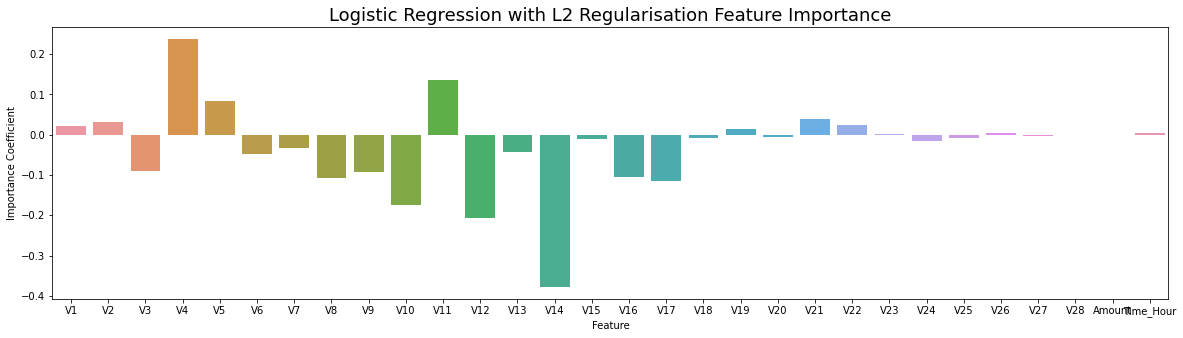

In [80]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)
plt.show()

In [81]:
# The following have a positive correlation:
# V4
# V5
# V11
# V21
# V22

# The following have a negative correlation:
# V14
# V3
# V10
# V12
# V16
# V17
# V8
# V9

In [82]:
# !pip3 install --upgrade pip


In [83]:
# !pip3 install -U scikit-learn

In [84]:
# !pip3 install imblearn
# !pip3 install -U imbalanced-learn
from platform import python_version
print(python_version())
import sklearn
sklearn.show_versions()

3.6.11

System:
    python: 3.6.11 (default, Jun 29 2020, 05:15:03)  [GCC 5.4.0 20160609]
executable: /home/disha/my_project_dir/py_36_env/bin/python
   machine: Linux-4.15.0-122-generic-x86_64-with-Ubuntu-16.04-xenial

Python dependencies:
          pip: 20.2.4
   setuptools: 45.2.0
      sklearn: 0.23.2
        numpy: 1.19.4
        scipy: 1.5.4
       Cython: None
       pandas: 1.1.4
   matplotlib: 3.3.2
       joblib: 0.17.0
threadpoolctl: 2.1.0

Built with OpenMP: True


In [85]:
from imblearn.under_sampling import RandomUnderSampler

# Oversampler
rus = RandomUnderSampler(sampling_strategy=0.5)
# Apply the transform
X_Under, y_Under = rus.fit_resample(X_train, y_train)
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Max auc_roc for l2: 0.9804633045061678
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-6.28824336e-02 -1.37277421e-01 -2.45184528e-01  7.15218039e-01
  -8.85670059e-02 -1.50061628e-01  5.56808851e-02 -1.71980820e-01
  -1.17941807e-01 -3.54280824e-01  2.00408976e-01 -4.15280062e-01
  -3.83574963e-01 -6.18478434e-01 -2.14955642e-02 -1.12579921e-01
  -5.69873563e-02 -3.37112910e-02 -4.62332905e-02 -2.25944809e-01
  -4.58525114e-02  1.44223073e-01  1.88998597e-01 -4.29938044e-02
   4.77547486e-02 -1.23367470e-01  2.59542794e-01  2.83855247e-02
  -3.41739345e-04 -4.52655182e-02]]
[-2.71496155]
{1: array([[0.58365385, 0.58685897, 0.61185897, 0.69967949, 0.86634615,
        0.94647436, 0.97564103, 0.98076923, 0.99358974, 0.99455128,
        0.99455128, 0.99455128, 0.99455128, 0.99455128, 0.99455128,
        0.99455128, 0.99455128, 0.99455128, 0.99455128, 0.99455128],
       [0.54320988, 0.54645874, 0.57439896, 0.69525666, 0.86289799,
        0.91780377, 0.94606888, 0.95451592, 0.

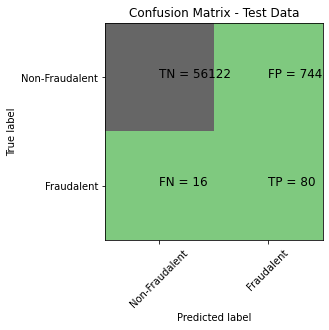

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.83      0.17        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


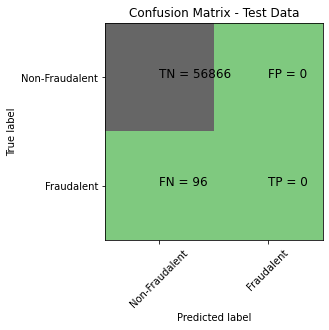

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9620628612293227
l2 threshold: 0.18751465054997996
ROC for the test dataset 96.2%


/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


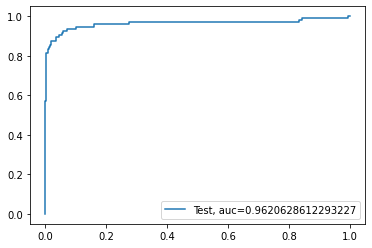

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


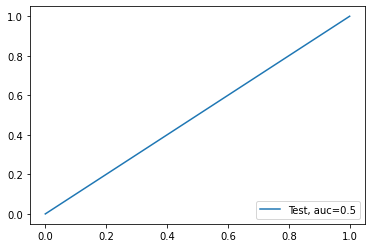

Time taken by logistic regression model:  2.756762742996216 seconds 
--------------------------------------------------------------------------------
model score
0.9710157648958955
Confusion Matrix


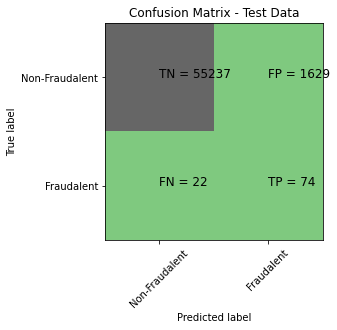

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.04      0.77      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.87      0.53     56962
weighted avg       1.00      0.97      0.98     56962

KNN roc_value: 0.9354352043986447
KNN threshold: 0.4
ROC for the test dataset 93.5%


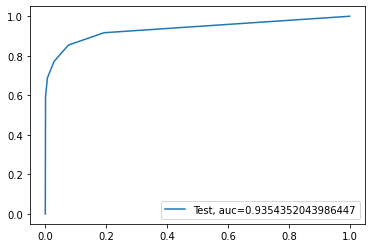

Time taken by KNN model:  3.885596752166748 seconds 
--------------------------------------------------------------------------------


NameError: name 'buildAndRunTreeModels' is not defined

In [86]:

###########################
# Logistic regression with L1 And L2 regularisation
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time taken by logistic regression model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

###########################
# KNN 
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time taken by KNN model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

###########################
# Decision tree models with  'gini' & 'entropy' criteria
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time taken by decision tree model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

###########################
# Random forest 
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time taken by random forest model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

###########################
# XGBoost model
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time taken by XGBoost model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

###########################
# SVM Model
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time taken by SVM model with sign=moid kernel:  %s seconds " % (time.time() - start_time))

In [87]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998806,0.995663,0.001807
4,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998876,0.913597,0.043968
5,RepeatedKFold Cross Validation,KNN,0.999280,0.904374,0.200000
6,Random Undersampling,Logistic Regression with L2 Regularisation,0.986658,0.962063,0.187515
7,Random Undersampling,Logistic Regression with L1 Regularisation,0.998315,0.500000,1.500000
8,Random Undersampling,KNN,0.971016,0.935435,0.400000


In [88]:
## Model building with balancing Classes

##### Perform class balancing with :
# - Random Oversampling
# - SMOTE
# - ADASYN

In [89]:
# We use Random Oversampling method to handle the class imbalance

In [90]:
# !pip install imblearn

In [91]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

In [ ]:
#### Data_Imbalance_Handiling

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9868311364036636
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.38814957  0.39011597  0.27721474  0.85430353  0.36004378 -0.48345922
  -0.3572175  -0.33708229 -0.23647566 -0.69735778  0.28303893 -0.92020115
  -0.31496494 -0.90673652  0.02329323 -0.57340661 -0.30842384 -0.11925789
   0.11550151 -0.73968645  0.07073972  0.5346485   0.13687064 -0.36899393
   0.19072257 -0.09873206 -0.38761477  0.16663036  0.00564583  0.03896615]]
[-5.16353889]
{1: array([[0.63207222, 0.76032822, 0.90786431, 0.95751202, 0.97734413,
        0.98480404, 0.9863595 , 0.98681898, 0.9870342 , 0.98711839,
        0.98711839, 0.98711839, 0.98711839, 0.98711839, 0.98711839,
        0.98711839, 0.98711839, 0.98711839, 0.98711839, 0.98711839],
       [0.63164597, 0.75750102, 0.90540993, 0.95726323, 0.97777034,
        0.98474237, 0.98588618, 0.98620956, 0.98652381, 0.98664286,
        0.98664286, 0.9866582 , 0.9866582 , 0.9866582 

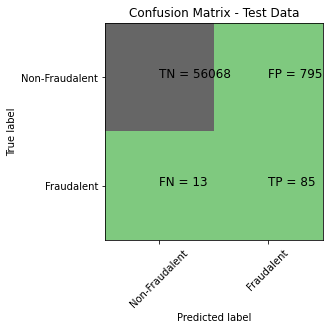

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


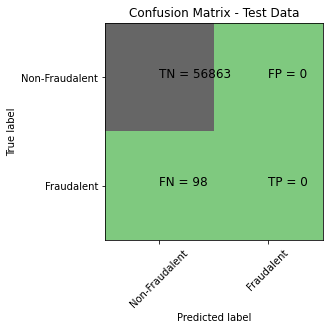

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9808063562727026
l2 threshold: 0.4340655153376228
ROC for the test dataset 98.1%


/home/disha/my_project_dir/py_36_env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


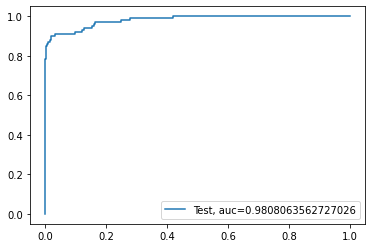

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


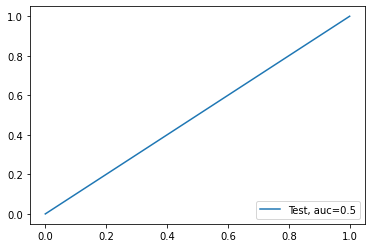

Time Taken by Model: --- 410.336505651474 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


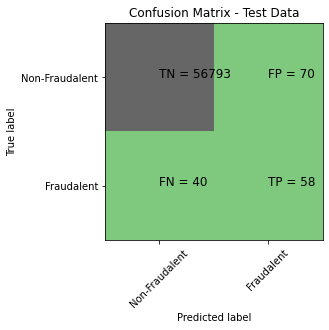

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


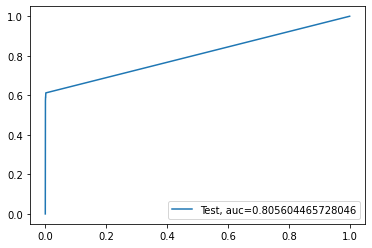

Time Taken by Model: --- 51.6626718044281 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria


NameError: name 'buildAndRunTreeModels' is not defined

In [93]:
# Random Oversampling with StratifiedKFold CV

###########
# Logistic regression
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time taken by logistic regression model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

######################
# KNN model
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time taken by KNN model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#######################
# Decision Tree Models with  gini and entropy criteria
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time taken by decision tree model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#######################
# Random Forest 
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time taken by random forest model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

######################
# XGBoost 
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time taken by XGBoost model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

######################
# SVM 
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time taken by SVM model:  %s seconds " % (time.time() - start_time))


In [94]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998806,0.995663,0.001807
4,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998876,0.913597,0.043968
5,RepeatedKFold Cross Validation,KNN,0.999280,0.904374,0.200000
6,Random Undersampling,Logistic Regression with L2 Regularisation,0.986658,0.962063,0.187515
7,Random Undersampling,Logistic Regression with L1 Regularisation,0.998315,0.500000,1.500000
8,Random Undersampling,KNN,0.971016,0.935435,0.400000
9,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.985815,0.980806,0.434066


In [95]:
# Oversampling with SMOTE Oversamplng

In [96]:
# Print the class distribution after applying SMOTE

TypeError: '(slice(None, 394, None), 0)' is an invalid key

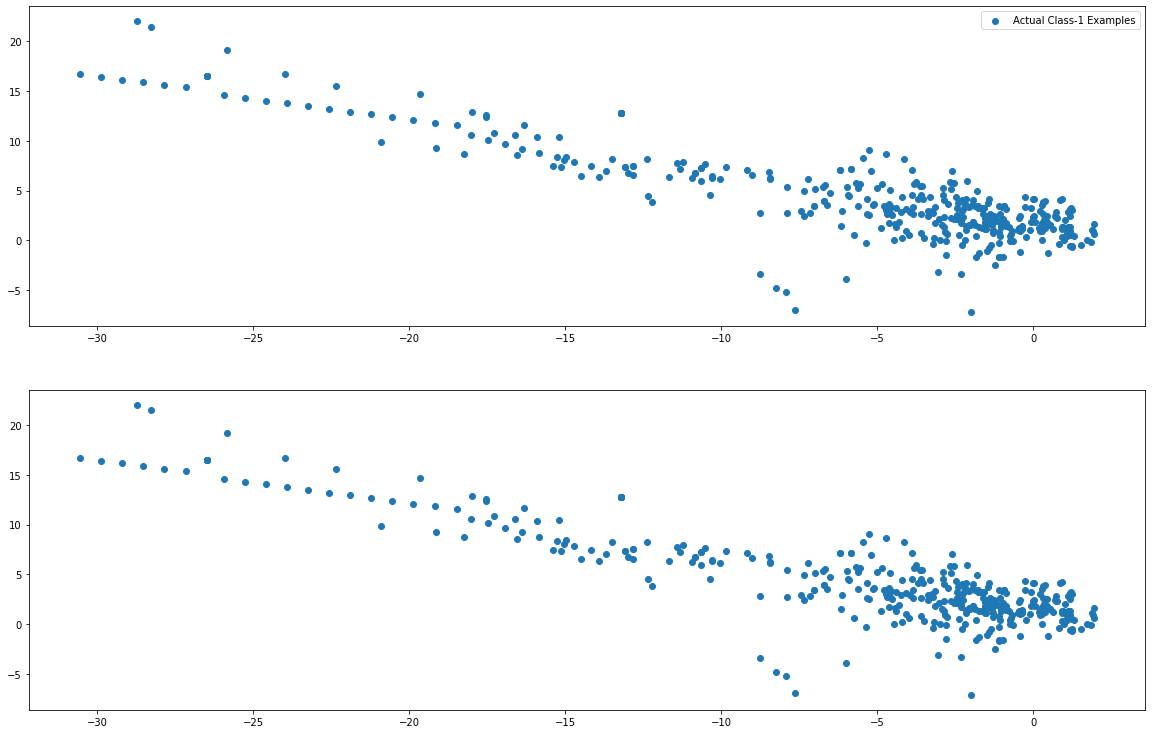

In [97]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)


In [98]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [99]:
#### Handling data imbalance: SMOTE

Max auc_roc for l2: 0.9930148997634461
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.77268817  0.70971976  0.68884066  0.93854204  0.49686819 -0.93771834
  -0.69677134 -0.50699255 -0.423089   -0.92038854  0.61723123 -1.25029449
  -0.23823023 -1.52798268  0.12543311 -0.78241118 -0.84373615 -0.43399837
   0.22149434 -1.08351946 -0.023527    0.56562984  0.4050634  -0.91725633
   0.50649871  0.03410319 -0.18132904  0.84944197  0.00903852  0.01106168]]
[-5.30144514]
{1: array([[0.64927751, 0.78559745, 0.91748425, 0.96520456, 0.98466299,
        0.98956394, 0.99070011, 0.99160607, 0.99195859, 0.992057  ,
        0.99206966, 0.99206966, 0.99206966, 0.99206966, 0.99206966,
        0.99206966, 0.99206966, 0.99206966, 0.99206966, 0.99206966],
       [0.6460276 , 0.7845671 , 0.91904908, 0.96766046, 0.98636753,
        0.99079354, 0.99182687, 0.99273024, 0.99311044, 0.99320627,
        0.99322167, 0.99322167, 0.99322167, 0.99322167, 0.99322167,
        0.99322167, 0.99322167, 0.99

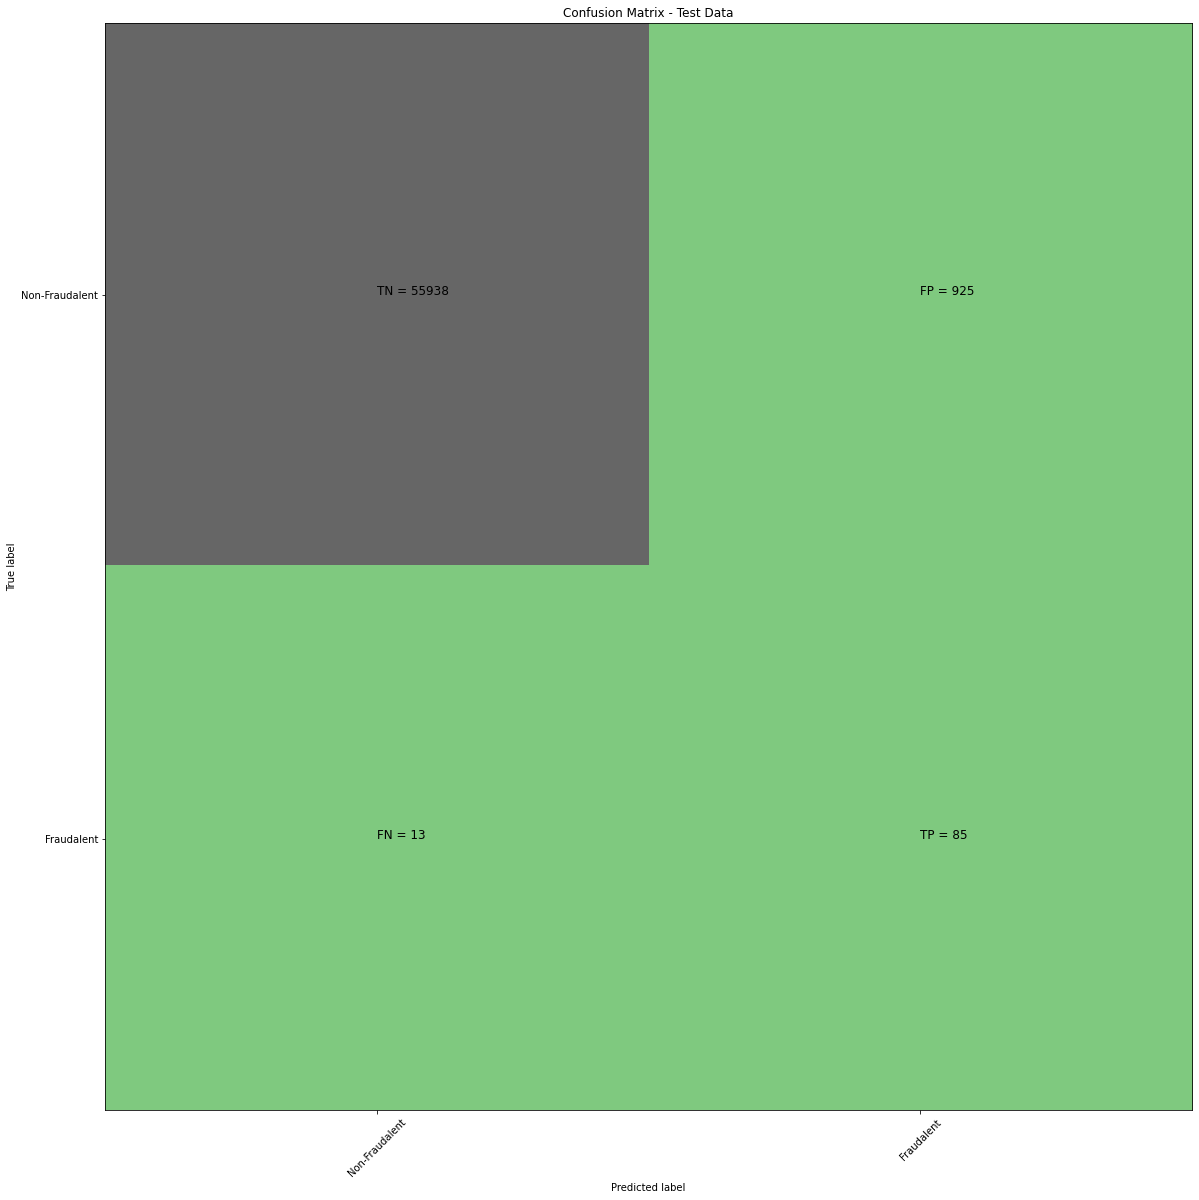

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


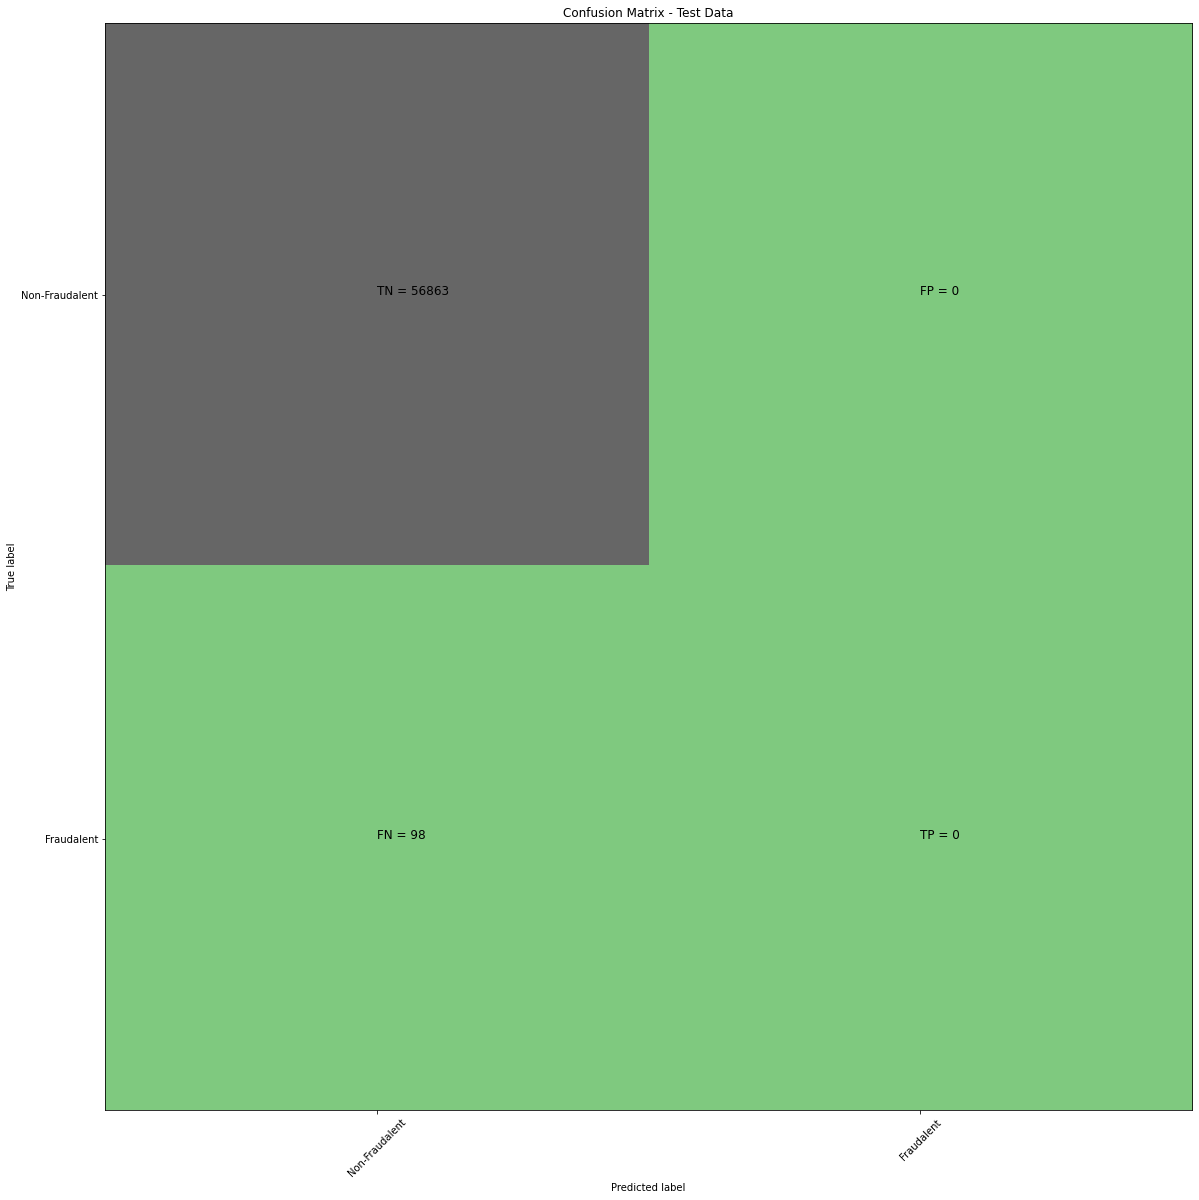

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9745779957341079
l2 threshold: 0.3940409453502683
ROC for the test dataset 97.5%


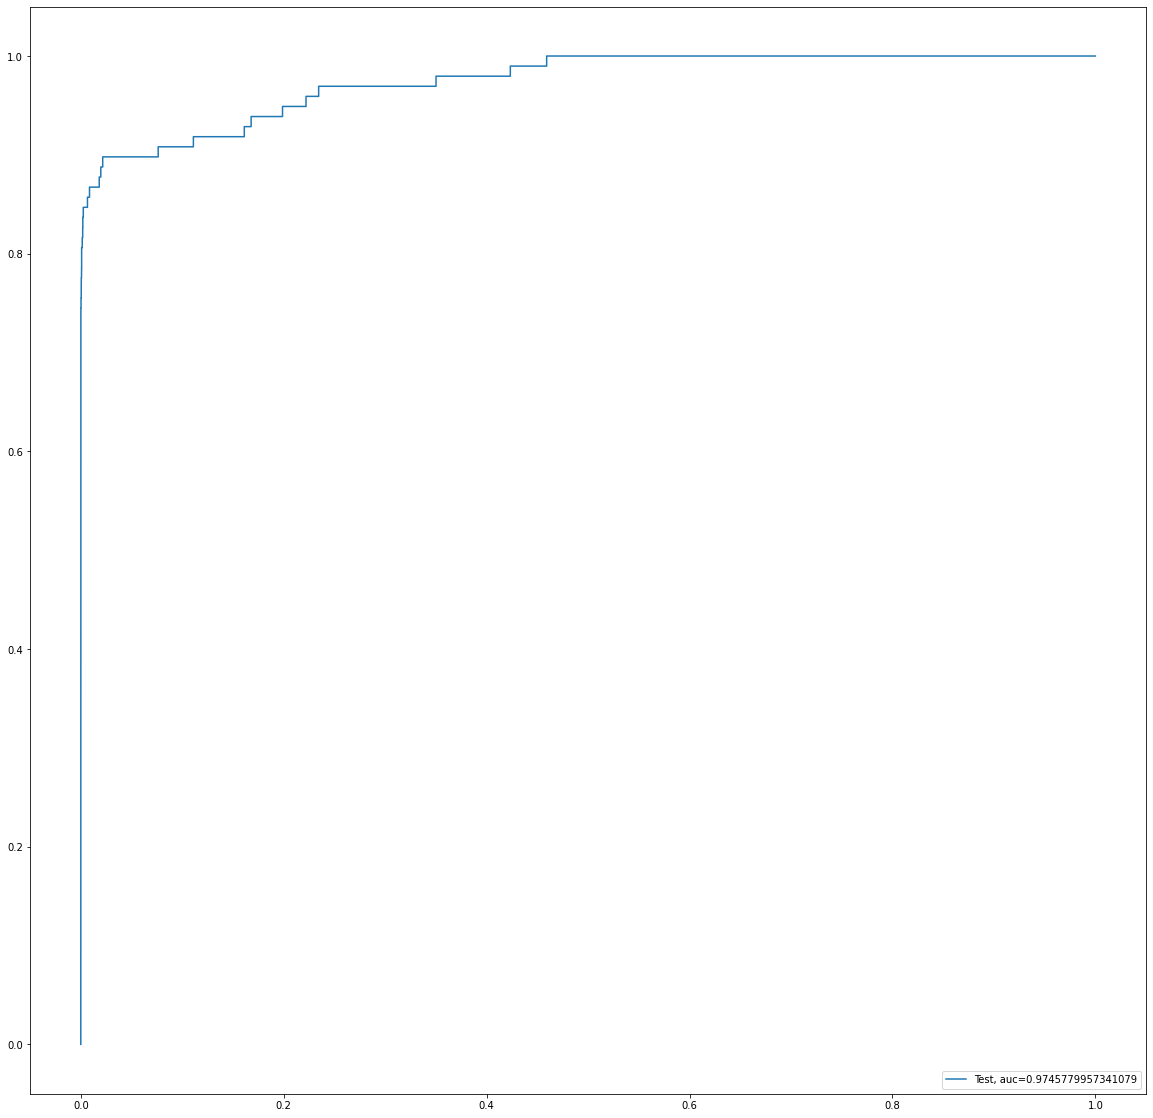

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


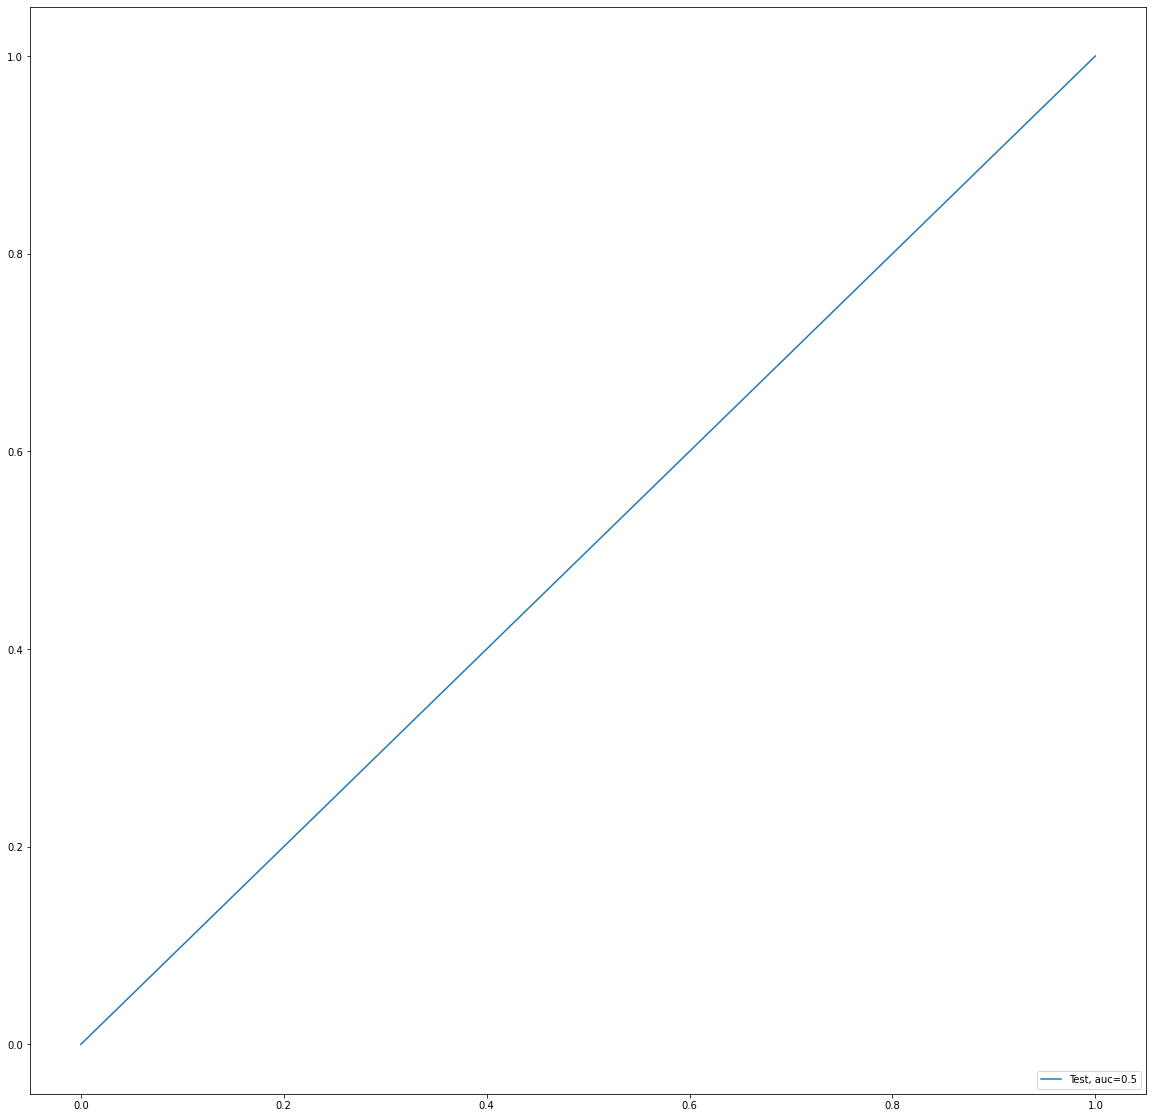

Time Taken by logistic regression model:  534.5168809890747 seconds 
--------------------------------------------------------------------------------
model score
0.9946805709169432
Confusion Matrix


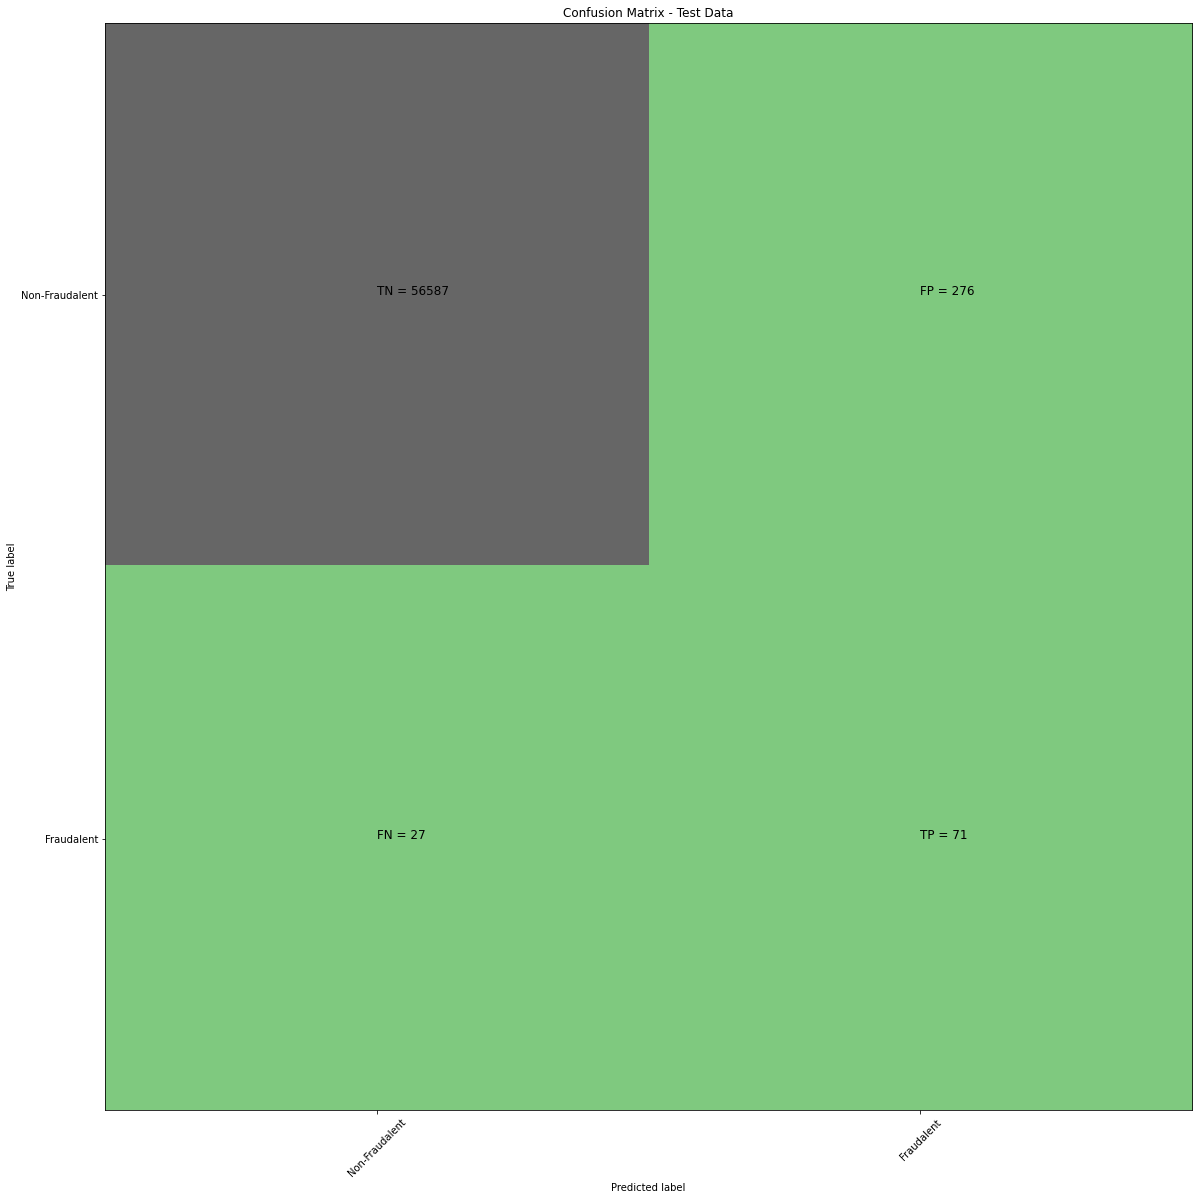

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


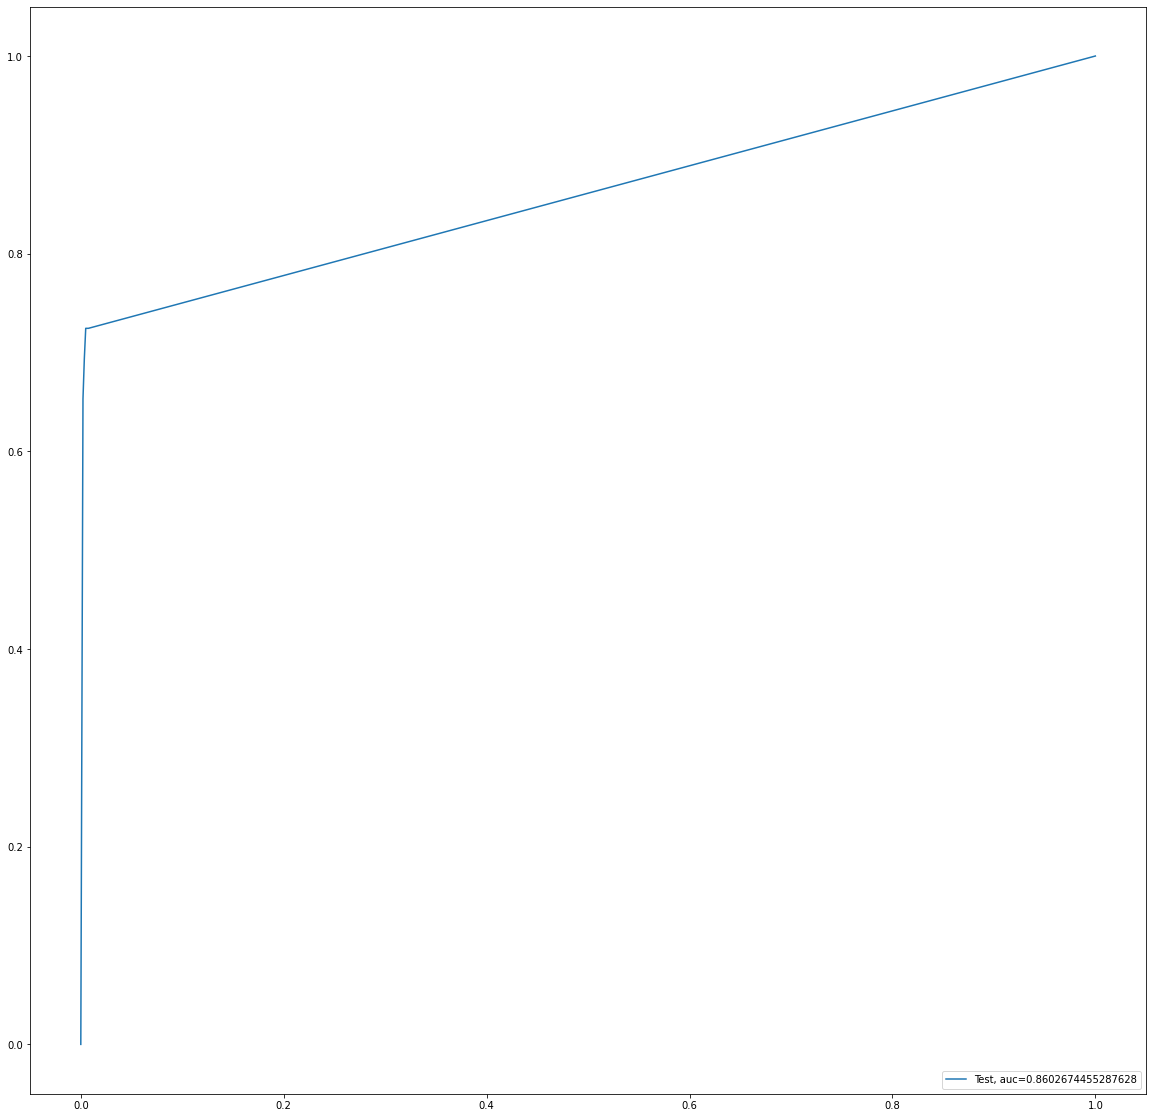

Time taken by KNN model:  59.05177855491638 seconds 
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria


NameError: name 'buildAndRunTreeModels' is not defined

In [103]:
# SMOTE Oversampling with StratifiedKFold CV

##############
# Logistic Regression with L1 And L2 regularisation
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by logistic regression model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

####################
# KNN Model
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time taken by KNN model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#################
# Decision tree
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time for decision tree model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

#############
# Random Forest Model
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time taken by random forest model:  %s seconds " % (time.time() - start_time))
print('-'*80 )

##################3
# XGBoost Model
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time taken by XGBoost model:  %s seconds " % (time.time() - start_time))
print('-'*80 )


##################3
# SVM
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time taken by SVM model: --- %s seconds ---" % (time.time() - start_time))

In [104]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.963903,0.009276
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998806,0.995663,0.001807
4,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.998876,0.913597,0.043968
5,RepeatedKFold Cross Validation,KNN,0.999280,0.904374,0.200000
6,Random Undersampling,Logistic Regression with L2 Regularisation,0.986658,0.962063,0.187515
7,Random Undersampling,Logistic Regression with L1 Regularisation,0.998315,0.500000,1.500000
8,Random Undersampling,KNN,0.971016,0.935435,0.400000
9,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.985815,0.980806,0.434066


In [254]:
# According to the result above, Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

In [255]:
# Overall conclusion after running models on Oversampled data:
# Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

# But looking at the results Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

In [256]:
# Parameter Tuning for the final model

In [106]:
!pip3 install xgboost

     |████████████████████████████████| 148.9 MB 40 kB/s  eta 0:00:011     |███████████████████████████████▎| 145.6 MB 7.5 MB/s eta 0:00:01


In [107]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994733238531627
XGboost roc_value: 0.9760769439759794
XGBoost threshold: 6.170859705889598e-05


In [108]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)

In [ ]:
# Tuning XGBoost model for max_depth and min_child_weight

# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import GridSearchCV 
# param_test = {
#  'max_depth':range(3,10,2),
#  'min_child_weight':range(1,6,2)
# }
# gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=3,
#               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=42,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1), 
# param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch1.fit(X_over, y_over)
# gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [110]:
# Tuning XGBoost model for n_estimators

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([35.22135248, 44.98406849, 56.70921865, 68.98508692, 76.53108974]),
  'std_fit_time': array([0.91133255, 0.31997405, 0.33356407, 0.46057286, 8.23227387]),
  'mean_score_time': array([0.15719652, 0.15790925, 0.19997029, 0.24415188, 0.25168257]),
  'std_score_time': array([0.02321079, 0.00896184, 0.01174447, 0.0069508 , 0.02333628]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.9981633 , 0.99902311, 0.99936925, 0.99943727, 0.99944355]),
  'split1_test_score': array([0.99915159, 0.99972147, 0.99985273, 0.99992111, 0.99994646]),
  'split2_test_score': array([0.99238133, 0.99604065, 0.99720045, 0.99838915, 0.99893894]),
  'split3_test_score': array([0.99870352, 0.9992

In [ ]:
# Tuning XGBoost model for n_estimators

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# Tuning XGBoost model for n_estimators

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
##### MOdel evaluation
# Evaluate XGboost model

from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

In [ ]:
# Tuninge XGBoost Model for n_estimators

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#### Model evaluation
# Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

In [ ]:
# Perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

In [ ]:
# Important features
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

In [ ]:
# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

In [ ]:
np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# ROC_AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGboost roc_value: {0}" .format(XGB_roc_value))

In [ ]:
# Model Selection

In [262]:
# Based on the results above, XGBoost model is the best. It must also be noted that Logistic Regression with L2 Regularisation with RepeatedKFold cross validation has been provided best results without any oversampling.
# Before are a few model evaluation metrics for the same:
# 1. XGBOOST model with random oversampling with StratifiedKFoldCV has provided best results. So we can try to tune the hyperparameters of this model to get best results
# 2. Accuracy: 0.9993855444953564
# 3. ROC_value: 0.9852138347557161
# 4. Threshold: 0.005087878089398146